In [17]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_gasolina_sp.csv"

df_original = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

In [19]:
df_original.head()

,Semestre,ΓêÒΓòùΓõÉRegiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,2020-01,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2020,4.399,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,2020-01,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2020,3.199,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,2020-01,SE,SP,ADAMANTINA,REDE GAZOLI AUTO POSTO LTDA.,09.116.143/0001-38,AVENIDA MARECHAL CASTELO BRANCO,15,NaN,VILA JAMIL DE LIMA,17800-000,GASOLINA,02/01/2020,4.390,NaN,R$ / litro,RAIZEN
3,2020-01,SE,SP,ADAMANTINA,REDE GAZOLI AUTO POSTO LTDA.,09.116.143/0001-38,AVENIDA MARECHAL CASTELO BRANCO,15,NaN,VILA JAMIL DE LIMA,17800-000,ETANOL,02/01/2020,2.790,NaN,R$ / litro,RAIZEN
4,2020-01,SE,SP,ADAMANTINA,AUTO POSTO CARREIRO LTDA,55.451.876/0001-46,AVENIDA CAP JOSE A DE OLIVEIRA,160,NaN,CENTRO,17800-000,GASOLINA,02/01/2020,4.340,3.91,R$ / litro,BRANCA


In [20]:
df = df_original

In [21]:
df = df[["Produto", "Valor de Compra", "Valor de Venda"]]

In [22]:
df = df.dropna()

In [23]:
df.head()

,Produto,Valor de Compra,Valor de Venda
4,GASOLINA,3.9100,4.340
5,ETANOL,2.5895,2.840
10,GASOLINA,4.0130,4.390
11,ETANOL,2.6013,2.790
12,GASOLINA,4.0040,4.459


In [24]:
contadores = df["Produto"].value_counts()

print(contadores)


GASOLINA    1106570
ETANOL      1066941
Name: Produto, dtype: int64


<AxesSubplot:xlabel='Produto', ylabel='count'>

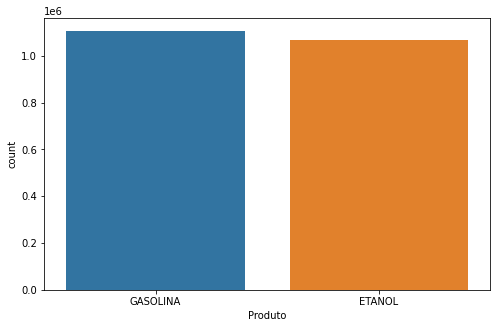

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="Produto", data=df, ax=ax)

<AxesSubplot:xlabel='Produto', ylabel='count'>

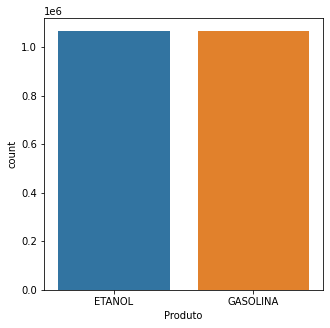

In [31]:
df_geral = pd.DataFrame()

labels = np.unique(df["Produto"])

for label in labels:
    periodo_subset = df.loc[df["Produto"] == label, :]
    sampled = periodo_subset.sample(1066941)
    df_geral = pd.concat([df_geral, sampled], ignore_index=True)

df = df_geral

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x="Produto", data=df, ax=ax)


# Realizando Regressão Logística

In [27]:
from sklearn.preprocessing import StandardScaler

# Definindo valores que serão utilizados
X = df[["Valor de Venda", "Valor de Compra"]].values
Y = df['Produto'].values

# Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Treinando o classificador
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predito', ylabel='Atual'>

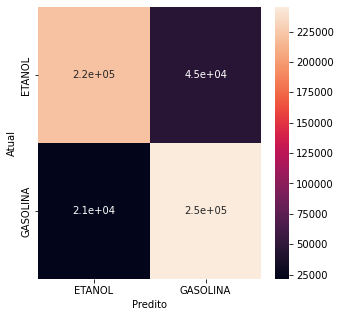

In [28]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

In [29]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      ETANOL       0.91      0.83      0.87    266827
    GASOLINA       0.84      0.92      0.88    266644

    accuracy                           0.87    533471
   macro avg       0.88      0.87      0.87    533471
weighted avg       0.88      0.87      0.87    533471



In [30]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train, y_train)

score = logisticRegression.score(X_test, y_test)

print("Acurácia geral: ", score)

Acurácia geral:  0.8745817485861462
